# Polarización Inducida

In [1]:
import numpy as np 
import pygimli as pg 
from pygimli.physics import ert 
import pygimli.meshtools as mt

In [2]:
world = mt.createWorld(start=[-50, 0], end=[50, -50], layers=[-6, -15], worldMarker=False)
block = mt.createCircle(pos=[-5, -11], radius=[4, 2], marker = 4, boundaryMarker=10)
poly = mt.createPolygon([(1, -4), (2, -1.5), (4, -2), (5, -2), 
                         (8, -3), (5, -3.5), (3, -4.5)], 
                        isClosed=True, marker=5, addNodes=3, 
                        interpolate="spline")

geom = world + block + poly

(<Axes: >, None)

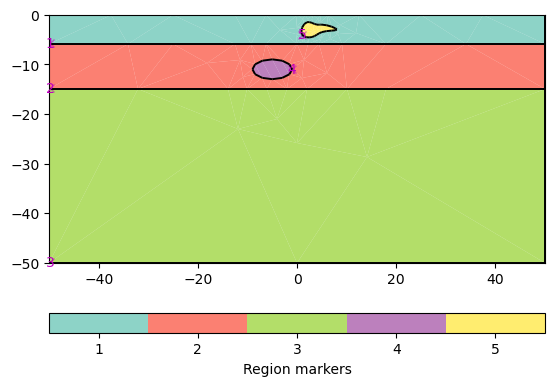

In [3]:
pg.show(geom)

In [31]:
scheme = ert.createData(elecs=np.linspace(start=-30, stop=30, num=64), schemeName='dd')

In [32]:
for p in scheme.sensors():
    geom.createNode(p)
    geom.createNode(p - [0, 0.1])

In [33]:
mesh = mt.createMesh(geom, quality=34)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1e66c6eaa90>)

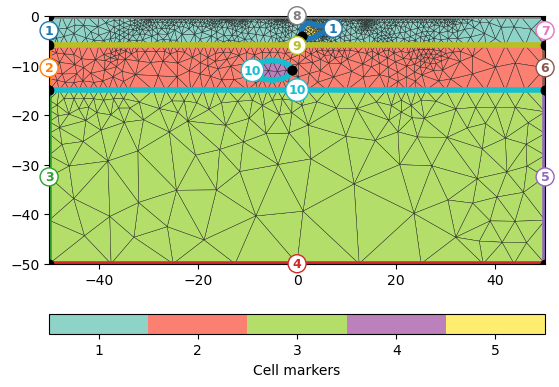

In [34]:
pg.show(mesh, markers=True, showMesh=True, boundaryMarker=False)

## Simulación en el Dominio del Tiempo

In [35]:
res = np.array([0, 100., 250., 400., 1., 10.])
m = np.array([0, 0, 0, 0, 0.1, 0])

In [36]:
mgr = ert.ERTIPManager()

In [37]:
dataTD = mgr.simulate(mesh=mesh, scheme=scheme, res=res, m=m)

09/02/24 - 19:40:40 - pyGIMLi - INFO - Found 1 regions.
09/02/24 - 19:40:40 - pyGIMLi - INFO - Creating forward mesh from region infos.
09/02/24 - 19:40:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Mesh: Nodes: 2542 Cells: 4561 Boundaries: 7102 4561 4561


09/02/24 - 19:40:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 9644 Cells: 18244 Boundaries: 14204
09/02/24 - 19:41:33 - pyGIMLi - INFO - Found 5 regions.
09/02/24 - 19:41:33 - pyGIMLi - INFO - Region with smallest marker set to background (marker=1)


In [38]:
dataTD.save('datos_ip/Synthetic_IP.dat')

1

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1e668f4ce50>)

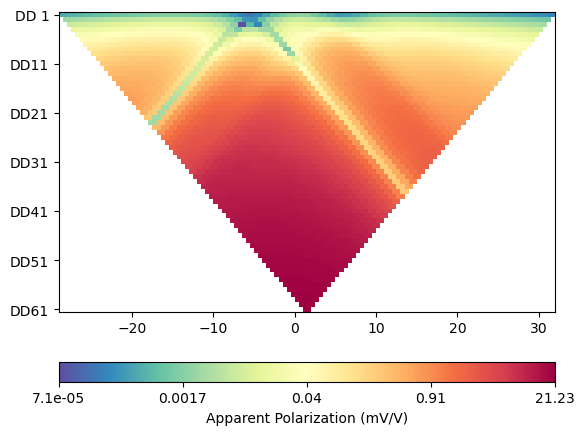

In [39]:
dataTD.show("ip", label = "Apparent Polarization (mV/V)", logScale=True)

In [40]:
import pandas as pd
import seaborn as sns

<Axes: ylabel='Count'>

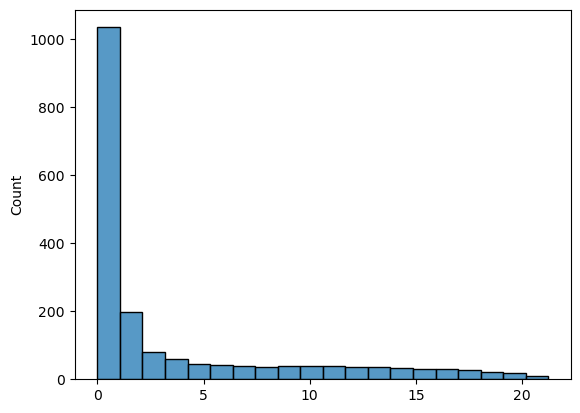

In [41]:
sns.histplot(dataTD["ip"], bins=20)

<Axes: ylabel='Density'>

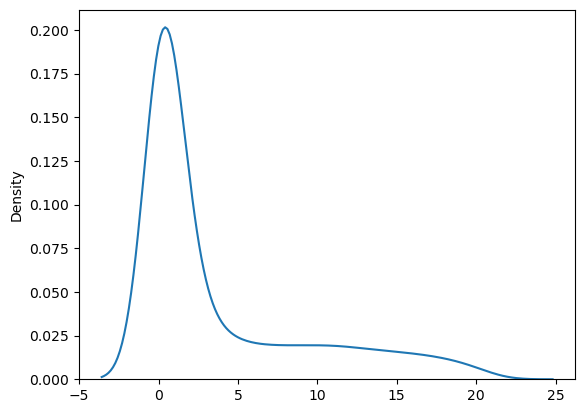

In [42]:
sns.kdeplot(dataTD["ip"])

## Inversión de los datos sintéticos

In [43]:
dataTD["err"] = ert.estimateError(dataTD)

In [44]:
mgr = ert.ERTIPManager(dataTD)

In [45]:
mgr.invert(verbose=True)

09/02/24 - 19:41:39 - pyGIMLi - INFO - Found 2 regions.
09/02/24 - 19:41:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/02/24 - 19:41:39 - pyGIMLi - INFO - Found 2 regions.
09/02/24 - 19:41:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/02/24 - 19:41:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
09/02/24 - 19:41:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
09/02/24 - 19:41:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2633 Cells: 4928 Boundaries: 3864
09/02/24 - 19:41:39 - pyGIMLi - INFO - Use median(data values)=98.22124846422162
09/02/24 - 19:41:39 - pyGIMLi - INFO - Created startmodel from forward operator: 970, min/max=98.221248/98.221248
09/02/24 - 19:41:39 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001E66AF323B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001E66AF32DB0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001E66AF32EA0>
min/max (data): 36.83/144
min/max (error): 3%/3%
min/max (start model): 98.22/98.22
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  105.46
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.56 (dPhi = 96.99%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

09/02/24 - 19:41:54 - pyGIMLi - INFO - Found 1 regions.
09/02/24 - 19:41:54 - pyGIMLi - INFO - Starting inversion.


chi² =    0.77 (dPhi = 63.09%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.77)                   #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x000001E66C56CB80>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001E667C51FA0>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001E66AF32A90>
min/max (data): 7.1e-08/0.02
min/max (error): 7.71%/1.4e+06%
min/max (start model): 7.5e-04/7.5e-04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   18.71
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   16.59 (dPhi = 11.08%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   12.30 (dPhi = 24.28

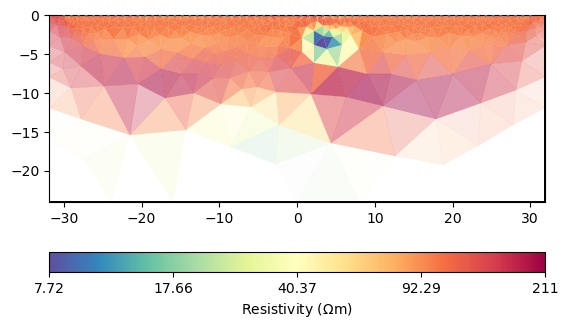

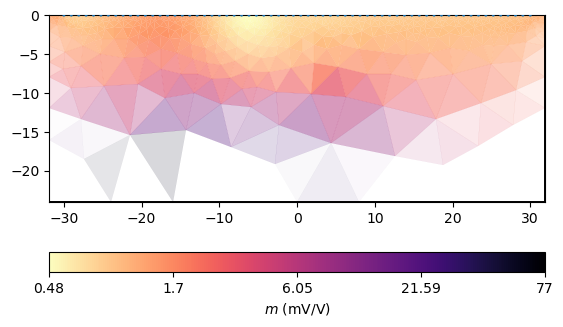

In [46]:
mgr.showResult()
ax, cb = mgr.showIPModel()